# MNIST handwritten digits

In [5]:
# download data 
#!curl -L -o ./mnist-csv.zip https://www.kaggle.com/api/v1/datasets/download/oddrationale/mnist-in-csv

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df_train = pd.read_csv('./dataset/mnist_train.csv')
df_test = pd.read_csv('./dataset/mnist_test.csv')

In [12]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [13]:
df_train.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [14]:
# image 28*28 = 784 + 1 (label)

df_train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train, Y_train = df_train.values[:, 1:], df_train.values[:, 0]
X_test, Y_test = df_test.values[:, 1:], df_test.values[:, 0]

In [20]:
print(X_train[:5, :])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


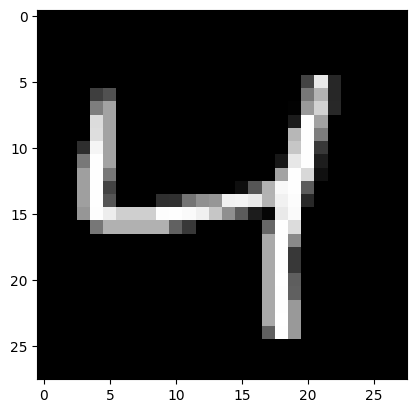

4


In [25]:
plt.imshow(X_train[2,:].reshape((28,28)), cmap='gray')
plt.show()
print(Y_train[2])

In [34]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

def knn(X, Y, Xq, k=5):
    neighbour = []

    # calculate distance of each vector from query vector
    for i in range(X.shape[0]):
        neighbour.append((distance(X[i], Xq), Y[i]))

    # sort neighbours based on the distance
    neighbour = sorted(neighbour)
    neighbour = np.array(neighbour) # convert list to numpy array
    neighbour = neighbour[:k]
    
    class_digit, class_count = np.unique(neighbour[:,1], return_counts=True)
    index = np.argmax(class_count)
    return class_digit[index]

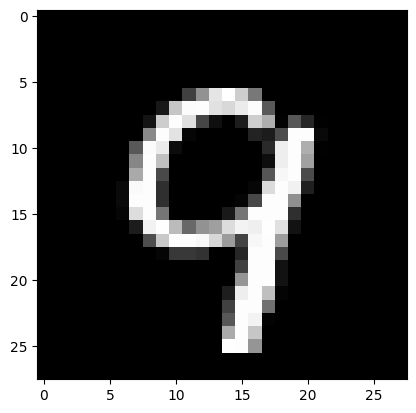

Expected result 9
K-NN result 9.0


In [35]:
plt.imshow(X_test[16,:].reshape(28,28), cmap='gray')
plt.show()
print("Expected result", Y_test[16])
print("K-NN result", knn(X_train, Y_train, X_test[16,:]))

In [42]:
# lets calculate the accuracy
def accuracy():
    Y_hat = []
    wrong_ans = []
    print("calculating expected results...")
    for Xq in X_test[:100,:]:
        computed_class = knn(X_train, Y_train, Xq)
        Y_hat.append(computed_class)
    print('calculating diff between expected and calculted result ...')
    positive = 0
    for i in range(100):
        if Y_test[i] == Y_hat[i]:
            positive += 1
        else:
            wrong_ans.append(i)
        i += 1
    print("wrong ans", wrong_ans)
    return (positive / 100)

In [43]:
import time

start = time.perf_counter()
print(accuracy())
end = time.perf_counter()
print("time_taken", end-start)

calculating expected results...
calculating diff between expected and calculted result ...
wrong ans [33]
0.99
time_taken 321.9841941600898


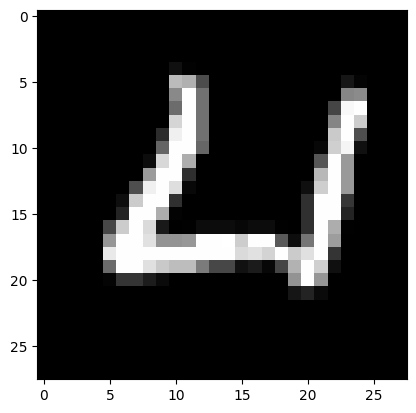

Expected 4
Calculated 0.0


In [46]:
#wrong ans
plt.imshow(X_test[33].reshape(28, 28), cmap='gray')
plt.show()
print("Expected", Y_test[33])
print("Calculated", knn(X_train, Y_train, X_test[33]))